In [1]:
%matplotlib inline
import numpy as np
from image_reader import Image_reader
from caption_generator import Caption_generator
import matplotlib.pyplot as plt

#Instantiate image_reader with GoogleNet mean image
mean_image = np.array([104, 117, 123]).reshape((3,1,1))
image_reader=Image_reader(mean=mean_image)

#Instantiate caption generator
caption_model_place='../models/caption_model.chainer'
cnn_model_place='../data/bvlc_googlenet_caffe_chainer.pkl'
index2word_place='../work/index2token.pkl'
caption_generator=Caption_generator(caption_model_place=caption_model_place,cnn_model_place=cnn_model_place,index2word_place=index2word_place)

/Users/Satoshi/anaconda/lib/python2.7/site-packages/chainer/functions/activation/lstm.py:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + numpy.exp(-x))


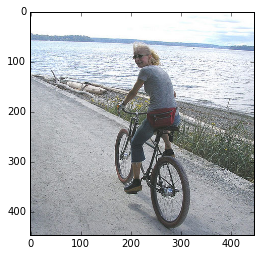

In [2]:
#The preparation is done
#Let's ganarate caption for a image

#How about this one?
image_file_path='../images/test_image.jpg'
im = plt.imread(image_file_path)
plt.imshow(im)

In [3]:
#First, read an image as numpy array
image_file_path='../images/test_image.jpg'
image=image_reader.read(image_file_path)
#Next, put the image into caption generator
#The output structure is 
#	[caption,caption,caption,...]
#	caption = {"sentence":This is a generated sentence, "probability": The probability of the generated sentence} 
captions=caption_generator.generate(image)

#For example, if you want to print all captions
for caption in captions:
    sentence=caption['sentence']
    probability=caption['probability']
    #score=caption['log_probability']
    print " ".join(sentence),probability

a man riding a bike down a street 0.0036873362381
a person riding a bike on a street 0.00275348457724
a man riding a bike down a road 0.00170924747556


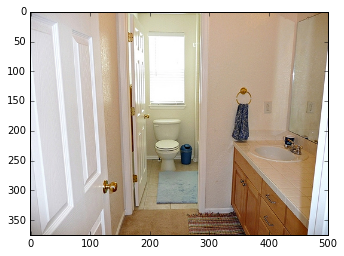

In [4]:
#Let's do for another image
image_file_path='../images/COCO_val2014_000000185546.jpg'
im = plt.imread(image_file_path)
plt.imshow(im)

In [5]:
image_file_path='../images/COCO_val2014_000000185546.jpg'
image=image_reader.read(image_file_path)
captions=caption_generator.generate(image)
for caption in captions:
    sentence=caption['sentence']
    probability=caption['probability']
    print " ".join(sentence),probability

a bathroom with a toilet , sink , and mirror 0.00197054474623
a bathroom with a toilet , sink , and shower 0.00135889247201
a bathroom with a toilet , sink , mirror and shower 0.000270611400346


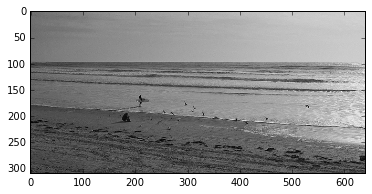

a group of people flying kites on a beach 0.00584152663338
a group of people on a beach flying a kite 0.00549940204729
a group of people standing on top of a beach 0.00479154873464


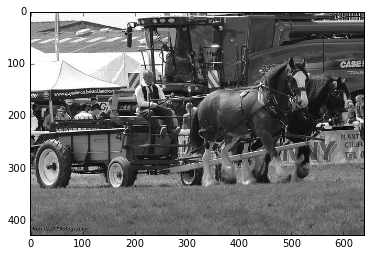

a group of people standing next to a truck 0.000481235624077
a group of people standing next to a large truck 0.000236762721649
a group of people standing next to a white truck 0.000225228080432


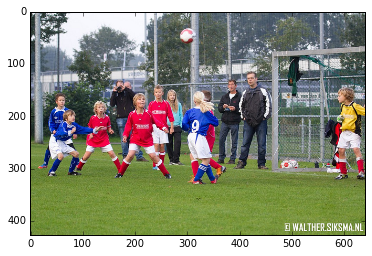

a group of young men playing a game of frisbee 0.0164175544355
a group of young men playing a game of soccer 0.0156280127775
a group of young people playing a game of soccer 0.0150356956664


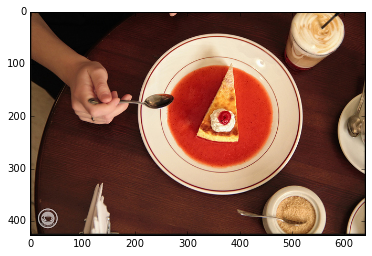

a white plate topped with a slice of cake 0.000704091312995
a white plate topped with a slice of pizza 0.000468262078046
a white plate topped with a sandwich and a cup 4.15361447396e-06


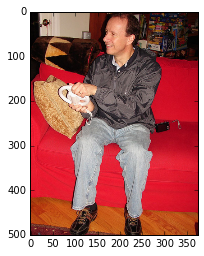

a man holding a nintendo wii game controller 0.00638317737159
a man holding a wii remote in his hand 0.000476438354886
a man holding a nintendo wii game controller in his hand 0.000133335078162


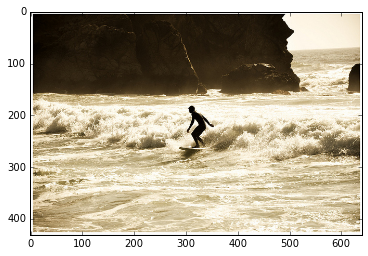

a surfer riding a wave in the ocean 0.0299218674482
a man riding a wave on a surfboard 0.0181638444793
a man riding a wave on top of a surfboard 0.100871251854


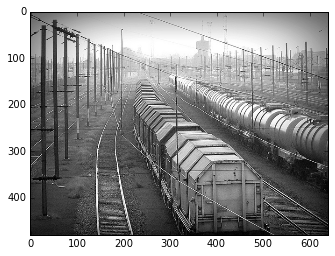

a train traveling down train tracks next to a building 0.000522909654374
a train traveling down train tracks near a train station 0.000440945744864
a train traveling down train tracks next to a train station 0.000680979634643


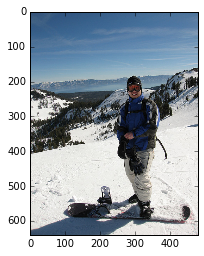

a person on a snowboard in the snow 0.00387523605576
a man standing on a snowboard in the snow 0.000866880145198
a man standing on a snow covered slope holding skis 4.22310846651e-05


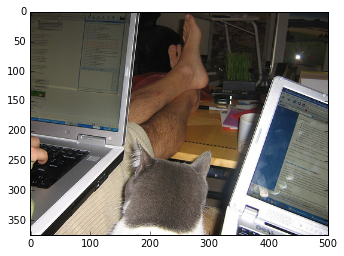

a cat sitting on top of a refrigerator 0.00446455250301
a cat sitting on top of a laptop computer 0.00482425197742
a cat is sitting on top of a laptop 0.0015229944471


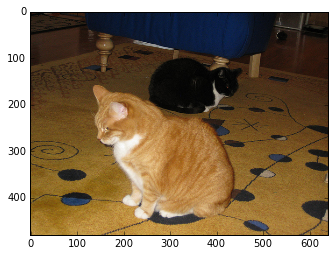

a cat sitting on a chair in a room 0.000619074762839
a cat is sitting on a chair in a room 0.000234071380601
a cat is sitting on a chair in a living room 5.43526632803e-05


In [6]:
#Sample for other images

def sample_generate(image_file_path):
    im = plt.imread(image_file_path)
    plt.figure()
    plt.imshow(im)
    plt.show()
    image=image_reader.read(image_file_path)
    captions=caption_generator.generate(image)
    for caption in captions:
        sentence=caption['sentence']
        probability=caption['probability']
        print " ".join(sentence),probability

images=[
'../images/COCO_val2014_000000192091.jpg',
'../images/COCO_val2014_000000229948.jpg',
'../images/COCO_val2014_000000241747.jpg',
'../images/COCO_val2014_000000250790.jpg',
'../images/COCO_val2014_000000277533.jpg',
'../images/COCO_val2014_000000285505.jpg',
'../images/COCO_val2014_000000323758.jpg',
'../images/COCO_val2014_000000326128.jpg',
'../images/COCO_val2014_000000397427.jpg',
'../images/COCO_val2014_000000553761.jpg',
]

for image in images:
    sample_generate(image)